In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/olivermcevoy/AstroCourseworkB/courseworkb.py'>

In [12]:
target =  'Kepler-11'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)


In [20]:
cursed_list = []
for i in range(1, 50):

    if i % 2 == 0:    
        print(f"Running iteration {i}")
    kepler_dataframe_tmp, stellar_data_tmp = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target,filter_type='savgol', randomise=True)
    cursed_list.append(kepler_dataframe_tmp)

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

Running iteration 2urve segment 62 of 62
Running iteration 4urve segment 62 of 62
Running iteration 6urve segment 62 of 62
Running iteration 8urve segment 62 of 62
Running iteration 10rve segment 62 of 62
Running iteration 12rve segment 62 of 62
Running iteration 14rve segment 62 of 62
Running iteration 16rve segment 62 of 62
Running iteration 18rve segment 62 of 62
Running iteration 20rve segment 62 of 62
Running iteration 22rve segment 62 of 62
Running iteration 24rve segment 62 of 62
Running iteration 26rve segment 62 of 62
Running iteration 28rve segment 62 of 62
Running iteration 30rve segment 62 of 62
Running iteration 32rve segment 62 of 62
Running iteration 34rve segment 62 of 62
Running iteration 36rve segment 62 of 62
Running iteration 38rve segment 62 of 62
Running iteration 40rve segment 62 of 62
Running iteration 42rve segment 62 of 62
Running iteration 44rve segment 62 of 62
Running iteration 46rve segment 62 of 62
Running iteration 48rve segment 62 of 62
         time   

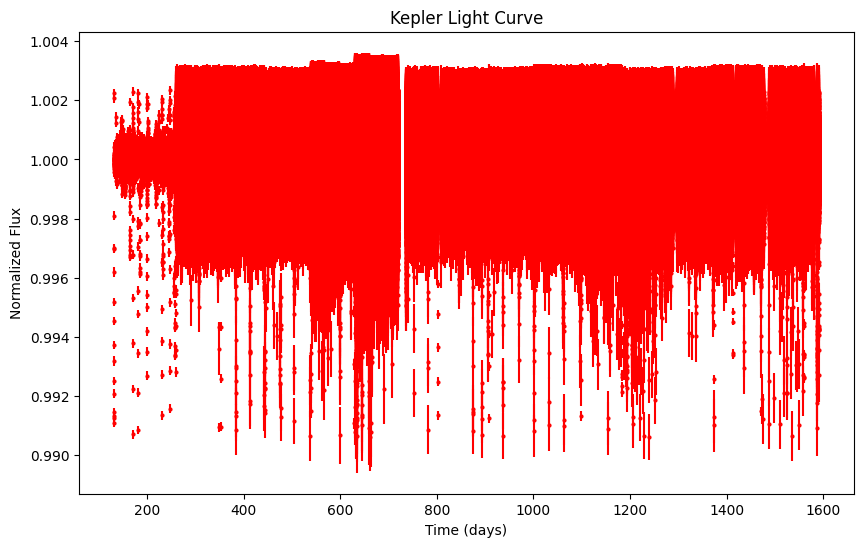

In [21]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


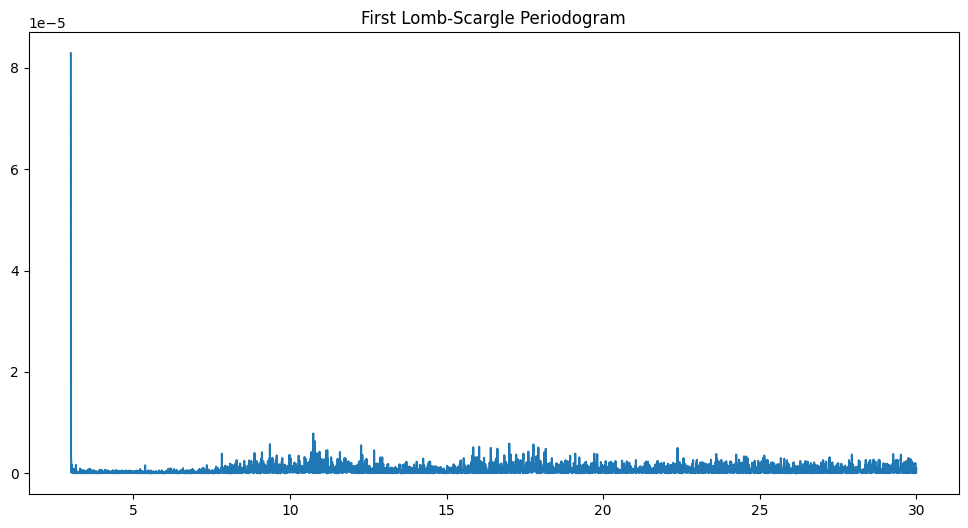

computing second periodogram
List of random light curves present, computing random light curves


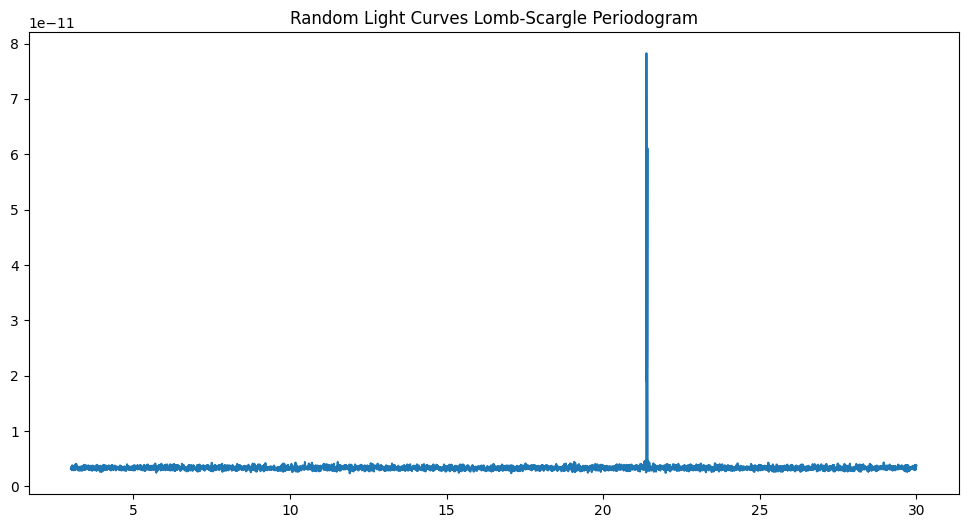

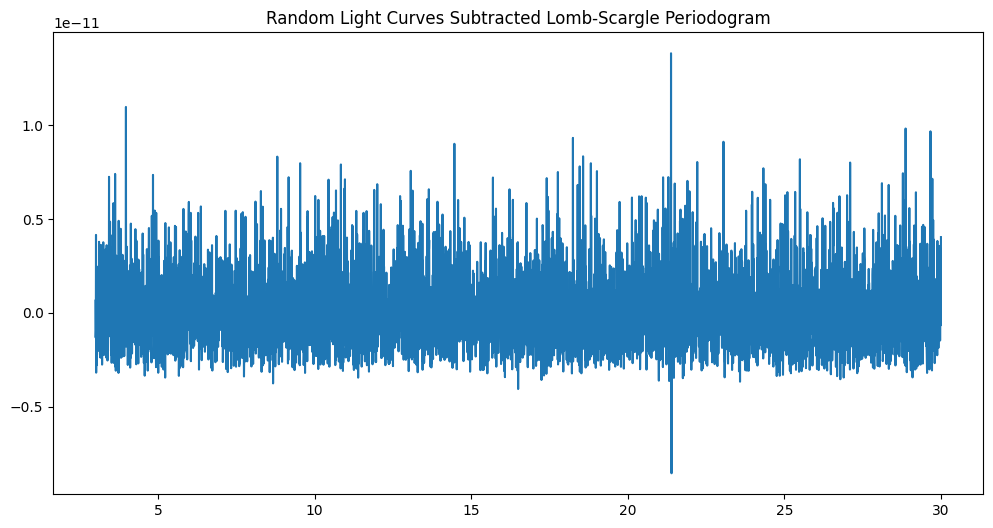

Gradient Threshold: 3.64e-10, Second Derivative Threshold: 9.15e-08


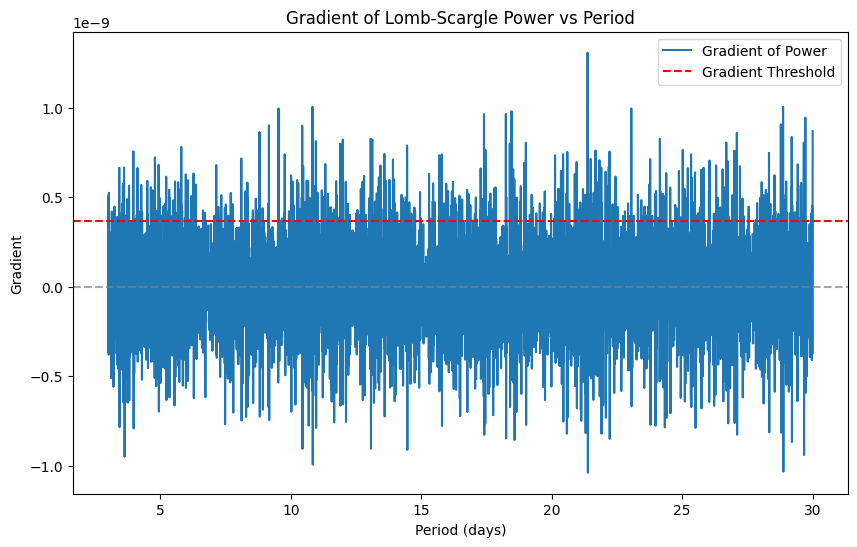

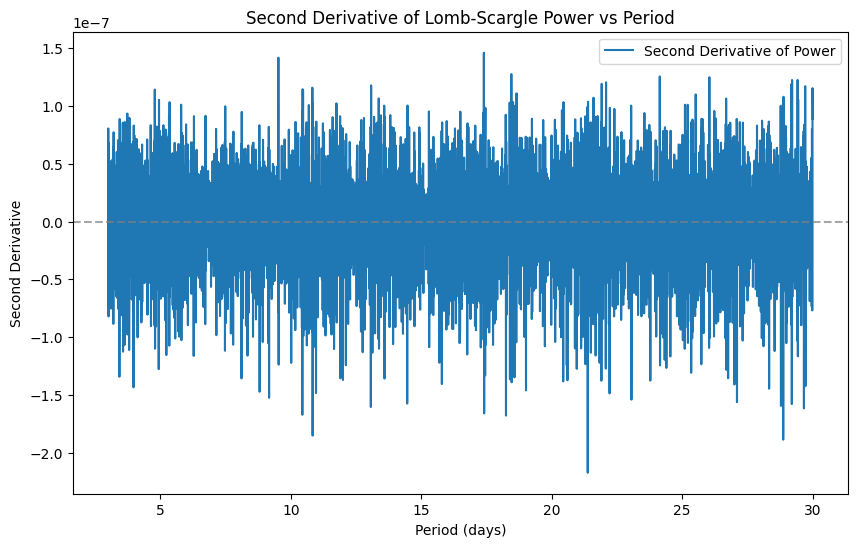

Excluding peaks before period = 3.01 days
Lomb-Scargle Periodogram analysis done


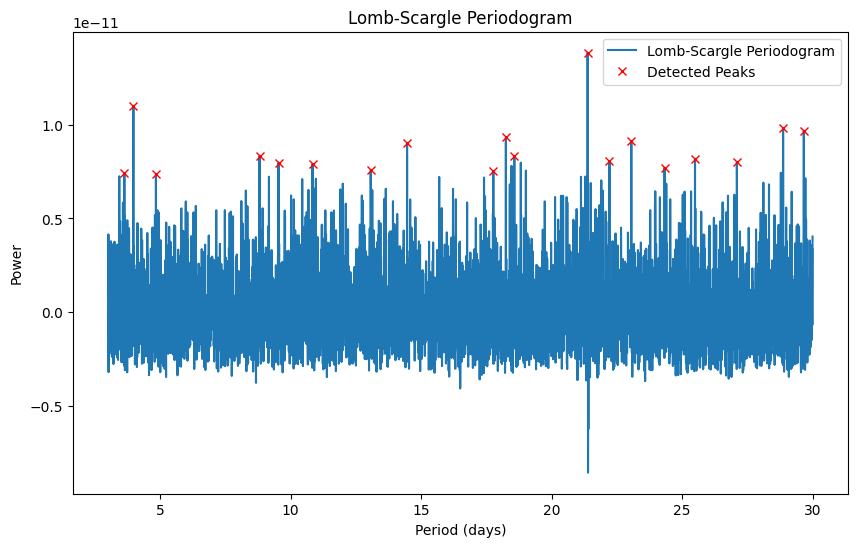

In [22]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (3 ,30)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)

# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [23]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))


results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      500
)





19
Adding period 3.627 days to the unique results.
Adding period 3.972 days to the unique results.
Adding period 4.836 days to the unique results.
Adding period 8.806 days to the unique results.
Adding period 9.535 days to the unique results.
Adding period 10.837 days to the unique results.
Adding period 13.068 days to the unique results.
Adding period 14.461 days to the unique results.
Adding period 17.767 days to the unique results.
Adding period 21.380 days to the unique results.
Adding period 23.054 days to the unique results.
Adding period 24.329 days to the unique results.
Adding period 27.100 days to the unique results.
Adding period 28.871 days to the unique results.
14
Analyzing period 3.63 days...
Analyzing period 3.97 days...
Analyzing period 4.84 days...
Analyzing period 8.81 days...
Analyzing period 9.54 days...
Analyzing period 10.84 days...
Analyzing period 13.07 days...
Analyzing period 14.46 days...
Analyzing period 17.77 days...
Analyzing period 21.38 days...
Analyzin

In [24]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 14
Adding period 3.781 days to the unique results.
Adding period 4.537 days to the unique results.
Adding period 8.000 days to the unique results.
Adding period 9.075 days to the unique results.
Adding period 10.665 days to the unique results.
Adding period 13.023 days to the unique results.
Adding period 15.997 days to the unique results.
Adding period 22.687 days to the unique results.
Adding period 26.051 days to the unique results.
Adding period 3.781 days to the final results.
Adding period 10.665 days to the final results.
Number of peaks found after removing duplicates: 2


/home/olivermcevoy/AstroCourseworkB/courseworkb.py:328: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.show()
/home/olivermcevoy/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


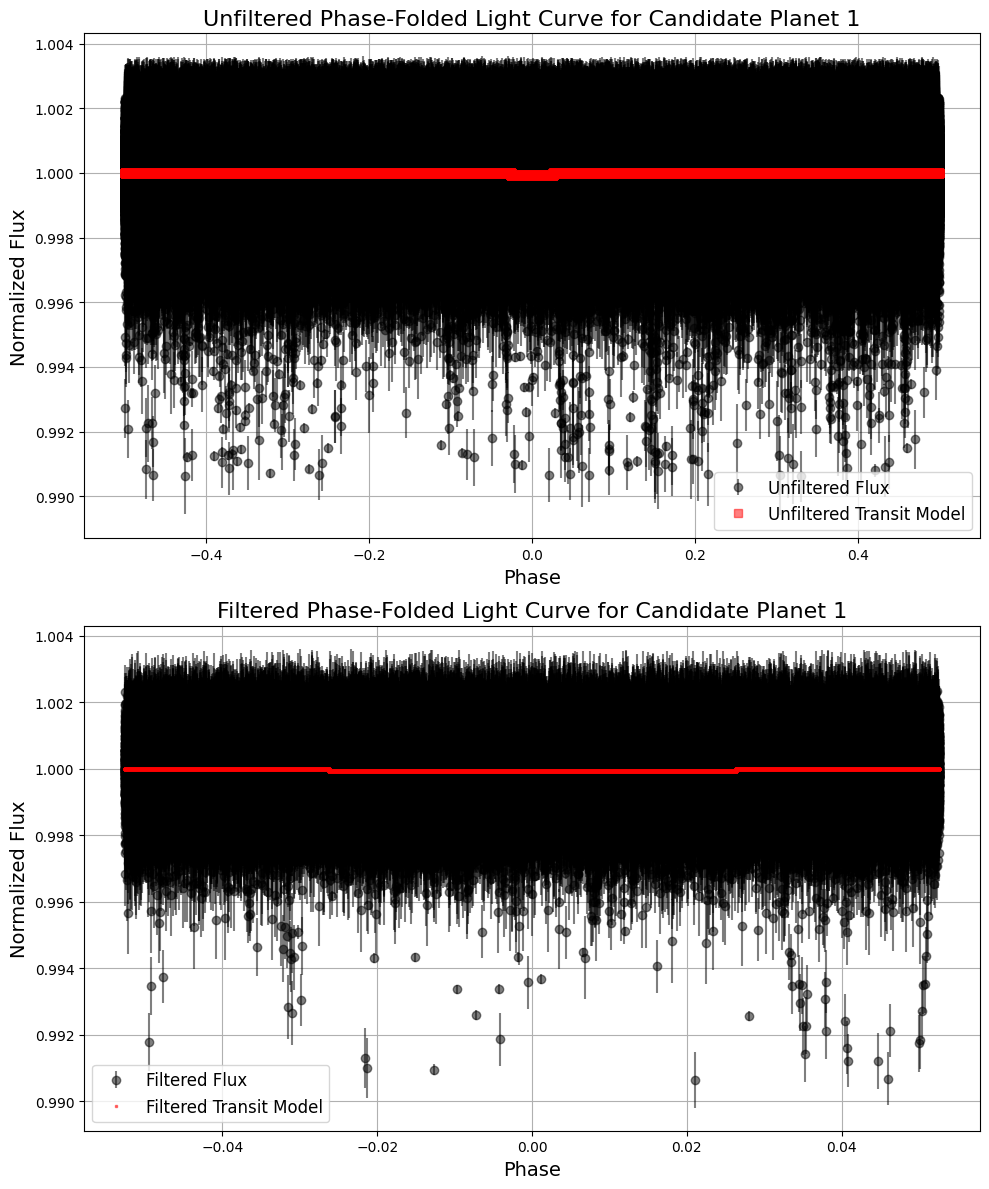

In [ ]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [19]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 3.87 days
  Refined Period = 3.56 days
  Transit Depth  = 6.58e-05
  Transit Duration = 0.14 days
  Power = 713.70
----------------------------------------
Best Transit Candidate: Period = 3.56 days, Depth = 6.58e-05
Estimated Planet Radius: 0.008 Solar Radii
Estimated Planet Radius: 0.926 Earth Radii
Estimated Planet Radius: 0.084 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 4.17 days
  Refined Period = 4.34 days
  Transit Depth  = 9.98e-05
  Transit Duration = 0.17 days
  Power = 1624.58
----------------------------------------
Best Transit Candidate: Period = 4.34 days, Depth = 9.98e-05
Estimated Planet Radius: 0.010 Solar Radii
Estimated Planet Radius: 1.140 Earth Radii
Estimated Planet Radius: 0.